In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2020_up1_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2020_up1_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0                                                   [N]
1                     [., @, WarrenBuffett, #, bitcoin]
2                                     [10k, #, Bitcoin]
3     [(, 9, 12, ), @, WarrenBuffett, feels, #, Bitc...
4     [(, 2, 12, ), @, WarrenBuffett, received, his,...
                            ...                        
77    [On, Unchained, ,, @, alpackaP, and, @, hossee...
78    [On, Unconfirmed, ,, @, KyleSamani, gives, his...
79    [The, @, ethtrustorg, has, been, formed, to, c...
80    [Our, friends, at, @, ConsenSysAcad, are, runn...
81    [The, team, at, @, getsimpleid, just, launched...
Name: text, Length: 984, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0                                             [(n, NN)]
1     [(., .), (@, CC), (warrenbuffett, JJ), (#, #),...
2                    [(10k, CD), (#, #), (bitcoin, NN)]
3     [((, (), (9, CD), (12, CD), (), )), (@, NN), (...
4     [((, (), (2, CD), (12, CD), (), )), (@, NN), (...
                            ...                        
77    [(on, IN), (unchained, JJ), (,, ,), (@, JJ), (...
78    [(on, IN), (unconfirmed, JJ), (,, ,), (@, JJ),...
79    [(the, DT), (@, NNP), (ethtrustorg, NN), (has,...
80    [(our, PRP$), (friends, NNS), (at, IN), (@, NN...
81    [(the, DT), (team, NN), (at, IN), (@, NNP), (g...
Name: pos tag, Length: 984, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0                                                   [n]
1                        [., warrenbuffett, #, bitcoin]
2                                          [#, bitcoin]
3     [(, ), @, warrenbuffett, feels, #, bitcoin, ne...
4     [(, ), @, warrenbuffett, received, first, #, b...
                            ...                        
77    [unchained, ,, @, alpackap, @, hosseeb, talk, ...
78    [unconfirmed, ,, @, kylesamani, gives, take, s...
79    [@, ethtrustorg, has, been, formed, create, ne...
80    [friends, @, consensysacad, are, running, give...
81    [team, @, getsimpleid, launched, privacy, pres...
Name: text, Length: 984, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

3270

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

3270


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"alot" + 0.001*"weight" + 0.001*"electrical" + 0.001*"etorous" + 0.001*"threshold" + 0.001*"arthurb" + 0.001*"presentation" + 0.001*"specification"')
(1, '0.001*"tolerance" + 0.001*"coincidence" + 0.001*"finger" + 0.001*"greedy" + 0.001*"auditabiity" + 0.001*"zkps" + 0.001*"hodling" + 0.001*"ttrevethan"')
(2, '0.001*"wonder" + 0.001*"suit" + 0.001*"cryptographic" + 0.001*"swag" + 0.001*"believer" + 0.001*"exclusive" + 0.001*"beng" + 0.001*"schnorr"')
(3, '0.001*"roast" + 0.001*"supporter" + 0.001*"author" + 0.001*"boat" + 0.001*"confidentiality" + 0.001*"alignment" + 0.001*"hyperbolic" + 0.001*"oversimplification"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

3270

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

3270

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

573.1768899111155

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.6905600639593827

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.03289946724343837

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[-0.021859753876924515, -0.026091966778039932,...",bitcoin,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.001772,0.896461,0.105311,NaN
60,"[-0.009919008240103722, -0.00774224242195487, ...",http,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.010982,0.129995,0.880987,NaN
180,"[-0.008774615824222565, -0.008524700067937374,...",people,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.006632,0.097074,0.909558,NaN
71,"[-0.0024325635749846697, -0.005285915918648243...",ethereum,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.021286,0.105516,0.915771,NaN
246,"[-0.013112950138747692, -0.010850898921489716,...",liquid,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.006439,0.088633,0.917806,NaN
223,"[-0.01214307639747858, -0.007204520981758833, ...",market,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.008356,0.070907,0.937449,NaN
74,"[-0.009819645434617996, -0.0076402765698730946...",crypto,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.011501,0.073439,0.938062,NaN
145,"[-0.011166635900735855, -0.008770017884671688,...",good,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.013211,0.072595,0.940616,NaN
700,"[-0.007442847825586796, -0.004514532629400492,...",trade,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.008578,0.067530,0.941048,NaN
56,"[-0.013140854425728321, -0.005713709630072117,...",make,0,"[-0.0013382387, -0.0011901449, 0.0034436942, -...",0.009831,0.064154,0.945678,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1343,"[0.0005104311858303845, -0.0006174826994538307...",troll,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.495048,0.003377,1.491671,NaN
2554,"[-0.0026173212099820375, 0.000668564869556576,...",apple,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.516470,0.001688,1.514782,NaN
3022,"[-0.0027449622284621, -0.0005664675845764577, ...",religious,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.522835,0.001688,1.521147,NaN
1080,"[0.0035645451862365007, 0.002018722938373685, ...",mark,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.529629,0.002532,1.527096,NaN
1646,"[-0.004207272082567215, -0.001272937166504562,...",promotional,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.542759,0.001688,1.541071,NaN
1629,"[0.0009214499150402844, 0.0009450854850001633,...",thesis,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.545108,0.002532,1.542576,NaN
368,"[-0.002033879281952977, -0.0028239749372005463...",freedom,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.545976,0.003377,1.542599,NaN
1898,"[-0.004195222165435553, -0.005014192312955856,...",liquidnetwork,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.549270,0.002532,1.546737,NaN
1477,"[-0.0014803215162828565, -0.000904828077182173...",nature,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.571361,0.000844,1.570517,NaN
2243,"[-0.000854162557516247, -0.004886792507022619,...",variant,1,"[-0.00046154796, -0.00018710004, -0.0001607667...",0.584358,0.002532,1.581826,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1467,"[-0.0008526323363184929, 0.0023523697163909674...",copyright,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.460771,0.004221,1.456550,NaN
1210,"[-0.004742670804262161, 0.003330723848193884, ...",niche,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.535774,0.000844,1.534930,NaN
1868,"[0.003843895625323057, 0.0027320189401507378, ...",invent,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.543850,0.001688,1.542162,NaN
1777,"[0.0015601066406816244, 0.0026533387135714293,...",kecamatan,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.545108,0.000844,1.544264,NaN
1915,"[0.004237578250467777, 0.002690207911655307, -...",fair,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.553796,0.003377,1.550420,NaN
1075,"[-0.004178943112492561, 0.00396766746416688, 0...",arrive,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.555492,0.003377,1.552115,NaN
2433,"[0.0022567776031792164, 0.004286903887987137, ...",btcps,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.553707,0.000844,1.552863,NaN
2013,"[-0.00386169389821589, 0.002128586173057556, 0...",leverage,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.563188,0.001688,1.561500,NaN
2545,"[-0.004446319304406643, -0.0020889253355562687...",philosophy,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.564455,0.000844,1.563611,NaN
2851,"[-0.0013146871933713555, 0.0038851348217576742...",wachsman_,2,"[-0.0002446356, 0.00093333237, 0.0005530887, -...",0.567728,0.000844,1.566884,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1823,"[-0.004014791455119848, 0.0002109984343405813,...",reply,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.496716,0.002532,1.494184,NaN
1525,"[0.0014700919855386019, 0.0044067068956792355,...",technique,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.518058,0.000844,1.517214,NaN
815,"[0.00013450984260998666, -0.000790588324889540...",focus,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.562134,0.004221,1.557913,NaN
3250,"[0.00039655828732065856, -0.002353064250200987...",consensysaudits,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.564868,0.000844,1.564024,NaN
755,"[0.0023999956902116537, 0.0008645063498988748,...",mindless,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.574059,0.001688,1.572370,NaN
2299,"[-0.0006831803475506604, 0.0020034820772707462...",briandrummondvo,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.574631,0.000844,1.573787,NaN
899,"[-0.004023676738142967, -0.0007780840969644487...",pillow,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.577012,0.000844,1.576168,NaN
1013,"[0.0033190525136888027, 0.0015791859477758408,...",opportunity,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.578638,0.001688,1.576950,NaN
560,"[-0.0007986206910572946, -0.004642192274332046...",bubble,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.581326,0.003377,1.577949,NaN
1603,"[-0.003476550802588463, -0.0015098202275112271...",fresh,3,"[0.0003865768, -0.00049119757, 0.00089502294, ...",0.584419,0.001688,1.582730,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

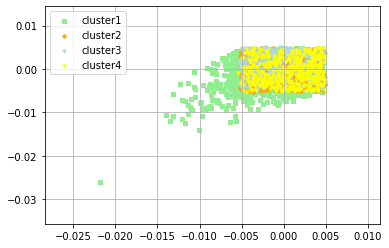

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소 돈

1888

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 비즈

473

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

479

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 긍정

430

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소,돈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 1 # 긍정

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

3.0756739615997652

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 1 3 ... 0 0 0]


In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-3.075674


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.12622885


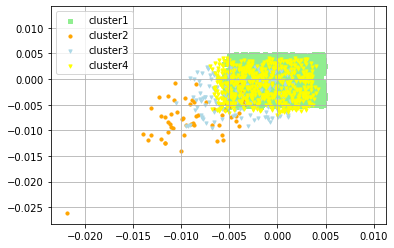

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 긍정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
40,"[-0.0009722818504087627, -0.001939287292771041...",love,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.029637,0.008441,1.021196,NaN
588,"[0.0003656853805296123, 0.00011472617916297168...",asics,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.027329,0.005909,1.021420,NaN
1033,"[-0.0038203129079192877, -0.001103479880839586...",total,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.027391,0.005065,1.022326,NaN
2794,"[-0.002099087694659829, -0.0021001321729272604...",jgarzik,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.026557,0.004221,1.022336,NaN
1264,"[-0.0037829719949513674, 0.003277668496593833,...",deal,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.025262,0.002532,1.022730,NaN
496,"[-0.003630775259807706, 0.0037296670489013195,...",mooc,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.025299,0.002532,1.022767,NaN
452,"[-0.0016499815974384546, 0.0025468626990914345...",expert,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.027860,0.005065,1.022795,NaN
128,"[0.0038354445714503527, 0.0005921876290813088,...",wake,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.028831,0.005909,1.022922,NaN
2836,"[0.003853968344628811, 0.004264591261744499, -...",moment,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.025508,0.002532,1.022976,NaN
2831,"[-0.001975750084966421, 0.00010695542732719332...",weather,0,"[-0.00030675594, -0.00020629709, 0.00082365074...",0.024716,0.001688,1.023027,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1,"[-0.021859753876924515, -0.026091966778039932,...",bitcoin,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.360351,0.896461,0.463891,NaN
60,"[-0.009919008240103722, -0.00774224242195487, ...",http,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.034482,0.129995,0.904487,NaN
71,"[-0.0024325635749846697, -0.005285915918648243...",ethereum,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.051049,0.105516,0.945533,NaN
74,"[-0.009819645434617996, -0.0076402765698730946...",crypto,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.030795,0.073439,0.957357,NaN
145,"[-0.011166635900735855, -0.008770017884671688,...",good,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.030205,0.072595,0.957610,NaN
278,"[-0.012136196717619896, -0.01160171814262867, ...",think,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.029932,0.066686,0.963246,NaN
50,"[-0.005362364929169416, -0.004686245694756508,...",time,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.028258,0.064998,0.963260,NaN
333,"[-0.01345711387693882, -0.011961295269429684, ...",year,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.031845,0.063309,0.968535,NaN
180,"[-0.008774615824222565, -0.008524700067937374,...",people,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.068670,0.097074,0.971596,NaN
7,"[-0.010712082497775555, -0.004112340975552797,...",value,1,"[-0.008762458, -0.0076807924, 0.023949658, -0....",0.028560,0.054024,0.974536,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
158,"[-0.0030179901514202356, -0.009107178077101707...",today,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.043307,0.041362,1.001945,NaN
306,"[-0.0017296615988016129, -0.003786931280046701...",start,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.027885,0.022791,1.005094,NaN
51,"[-0.0014927330194041133, -0.000592900149058550...",thank,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.029290,0.023636,1.005654,NaN
48,"[-0.009104693308472633, 0.00011703532072715461...",great,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.029452,0.022791,1.006661,NaN
455,"[-0.0028194687329232693, 0.0016539805801585317...",important,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.028314,0.020259,1.008055,NaN
103,"[-0.000800869835074991, 0.001634632470086217, ...",company,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.029556,0.021103,1.008452,NaN
235,"[-0.003784912871196866, -0.003212191630154848,...",mean,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.029950,0.020259,1.009691,NaN
159,"[-0.006240343675017357, -0.006011273246258497,...",world,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.032549,0.022791,1.009758,NaN
935,"[-0.0002845515846274793, 0.0014743504580110312...",history,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.031261,0.021103,1.010158,NaN
121,"[-0.00579724321141839, -0.002938249846920371, ...",learn,2,"[-0.00387605, -0.0028041438, 0.009615351, -0.0...",0.029254,0.018571,1.010683,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2755,"[-0.002618426689878106, -0.003173018107190728,...",present,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.025380,0.008441,1.016938,NaN
33,"[-0.002686352701857686, -0.0024801460094749928...",amaze,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.026732,0.008441,1.018291,NaN
132,"[0.0004583940317388624, -0.006146167870610952,...",maximalist,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.031230,0.012662,1.018568,NaN
1073,"[-0.0006118614692240953, 0.001335194450803101,...",industry,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.027978,0.009285,1.018692,NaN
112,"[-0.003964389208704233, 0.002567762043327093, ...",dollar,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.029997,0.010974,1.019024,NaN
38,"[0.0010568733559921384, -0.006430480163544416,...",tron,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.035464,0.016038,1.019426,NaN
2750,"[0.0007346209022216499, -0.0046061440370976925...",thepepoapp,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.029557,0.010130,1.019428,NaN
2749,"[-0.0002667306689545512, -0.002585869515314698...",bitpay,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.029564,0.010130,1.019434,NaN
842,"[0.002160675125196576, 0.0005968077457509935, ...",valuable,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.027906,0.008441,1.019465,NaN
1047,"[0.0010884454241022468, 0.001273708650842309, ...",launch,3,"[-0.0014247482, -0.0012269428, 0.00372076, -0....",0.028787,0.009285,1.019502,NaN


In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #긍정적

2483

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #거래소

57

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #투자

161

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

569

In [89]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 1 # 긍정적
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [90]:
temp_cluster_result1['result'] = 1 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 1
temp_cluster_result1['Silhouette'] = 0.12622885 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.12622885

In [91]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2020_up1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2020_up1_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

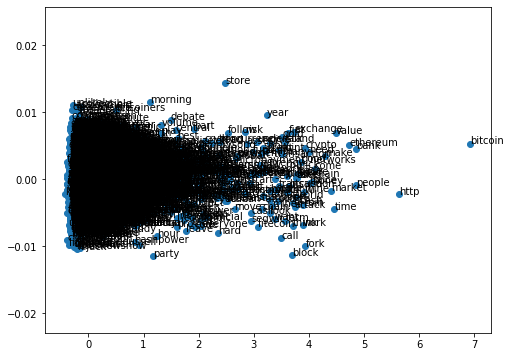

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>